<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/classdemo/residuals_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pylab as plt

In [135]:
np.random.seed(302)
x = np.arange(100)
y = np.random.randn(100) + x / 10


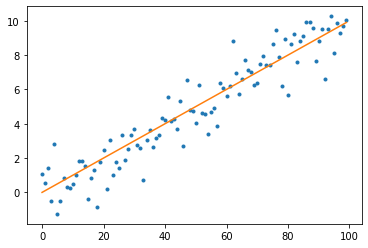

In [136]:
plt.plot(x, y, '.')
plt.plot(x, x/10)

In [137]:
residuals = y - x / 10

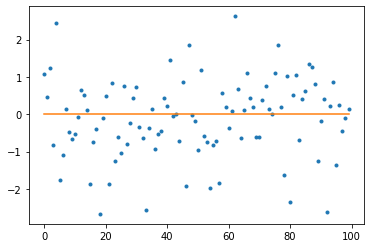

In [138]:
plt.plot(x, residuals, '.')
plt.plot(x, x - x);

In [144]:
def resplot(x, y, fit=False):
  fig = plt.figure(figsize=(10,5))
  left, width = 0.1, 0.65
  bottom, height = 0.1, 0.65
  rect_scatter = [left, bottom + 0.3, width, height]
  rect_histx = [left, bottom, width, 0.3]
  #    rect_histy = [left_h, bottom, 0.2, height]
  plt.subplots_adjust(hspace=0., wspace=0.1)
  ax = plt.axes(rect_scatter)
  axres = plt.axes(rect_histx)
  ax.minorticks_on()
  axres.minorticks_on()
  plt.setp(ax.get_xticklabels(),
            visible=False)
  ax.plot(x, y, '.')
  ax.plot(x, x/10) 
  residuals = y - x/10
  axres.plot(x, residuals, '.')
  axres.plot(x, x - x);
  return ax, axres

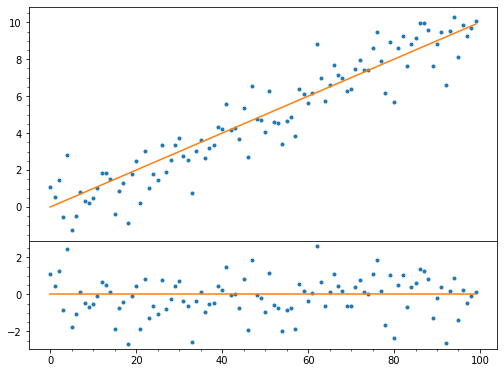

In [145]:
resplot(x, y);

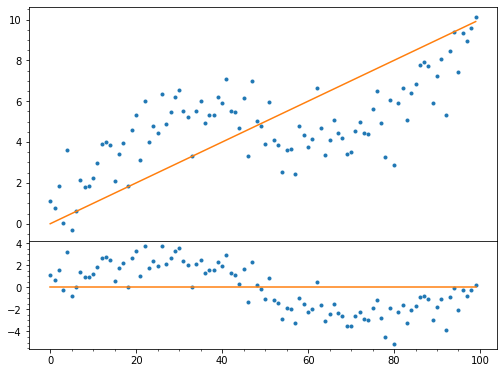

In [146]:
np.random.seed(302)
y2 = np.random.randn(100) + x / 10 + 3*np.sin(x / np.pi / 5)
resplot(x, y2);

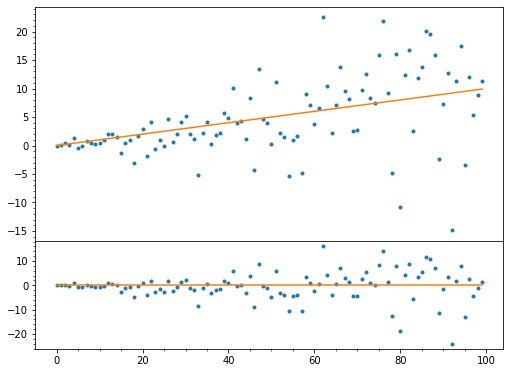

In [169]:
np.random.seed(302)
y3 = np.random.randn(100) * x / 10  + x / 10 
resplot(x, y3);

In [170]:
import statsmodels.api as sm

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2905.
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                    3.52e-75
Time:                        16:11:12   Log-Likelihood:                         -146.84
No. Observations:                 100   AIC:                                      295.7
Df Residuals:                      99   BIC:                                      298.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0993      0.002     53.900      0.000       0.096       0.103
==============================================================================
Omnibus:                        1.259   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                0.833
Skew:                          -0.204   Prob(JB):                        0.659
Kurtosis:                       3.183   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

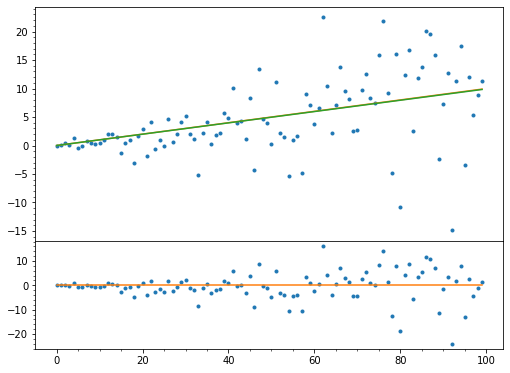

In [171]:
ax1, ax2 = resplot(x, y3)
ml = sm.OLS(exog=x, endog=y).fit()
ax1.plot(x, ml.predict())
ml.summary()

In [172]:
from statsmodels import stats as sms
from scipy import stats
name = ['Jarque-Bera', 'Skew', 'Kurtosis', 'Chi^2 two-tail prob.', ]
jbtest = sms.stattools.jarque_bera(ml.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest)
      )

omnitest = sms.stattools.omni_normtest(ml.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest[1])) 
print("my favorite...")
print("KS test for normality KS statistics {:.2}, p-value {:.2}".format(
    *stats.kstest(ml.resid, 'norm')))

Jarque-Bera test of residuals JB statistics value 0.83, skewness -0.2, Kurtosis 3.2, 
Chi2 probability 0.66
Omni test : Chi2 probability 0.53
my favorite...
KS test for normality KS statistics 0.06, p-value 0.86


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              608.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                    4.56e-44
Time:                        16:11:16   Log-Likelihood:                         -209.64
No. Observations:                 100   AIC:                                      421.3
Df Residuals:                      99   BIC:                                      423.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0852      0.003     24.667      0.000       0.078       0.092
==============================================================================
Omnibus:                        7.042   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                3.079
Skew:                          -0.100   Prob(JB):                        0.215
Kurtosis:                       2.164   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

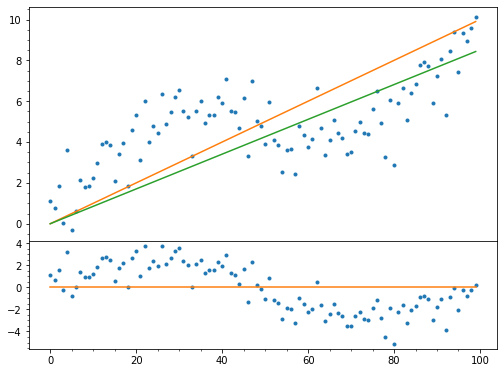

In [173]:
ax1, ax2 = resplot(x, y2)
ml2 = sm.OLS(exog=x, endog=y2).fit()
ax1.plot(x, ml2.predict())
ml2.summary()

In [174]:
jbtest2 = sms.stattools.jarque_bera(ml2.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest2)
      )

omnitest2 = sms.stattools.omni_normtest(ml2.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest2[1])) 
print("my favorite...")
print("KS test for normality KS statistics {:.2}, p-value {:.2}".format(
    *stats.kstest(ml2.resid, 'norm')))

Jarque-Bera test of residuals JB statistics value 3.1, skewness -0.1, Kurtosis 2.2, 
Chi2 probability 0.21
Omni test : Chi2 probability 0.03
my favorite...
KS test for normality KS statistics 0.31, p-value 3.7e-09


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.481
Model:                            OLS   Adj. R-squared (uncentered):              0.476
Method:                 Least Squares   F-statistic:                              91.92
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                    8.70e-16
Time:                        16:11:23   Log-Likelihood:                         -319.81
No. Observations:                 100   AIC:                                      641.6
Df Residuals:                      99   BIC:                                      644.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0996      0.010      9.587      0.000       0.079       0.120
==============================================================================
Omnibus:                       19.103   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.116
Skew:                          -0.661   Prob(JB):                     2.63e-10
Kurtosis:                       5.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

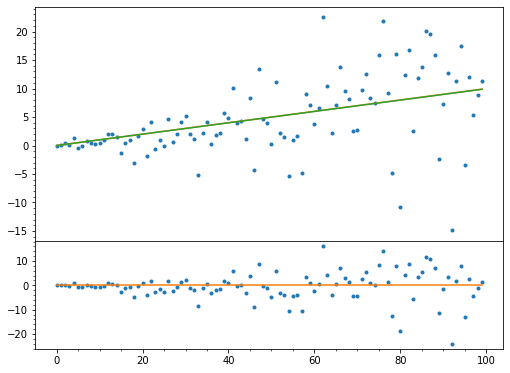

In [175]:
ax1, ax2 = resplot(x, y3)
ml3 = sm.OLS(exog=x, endog=y3).fit()
ax1.plot(x, ml3.predict())
ml3.summary()

In [176]:
jbtest3 = sms.stattools.jarque_bera(ml3.resid)
print("Jarque-Bera test of residuals", 
      "JB statistics value {0:.2}, skewness {2:.2}, Kurtosis {3:.2}, \nChi2 probability {1:.2}".format(   
      *jbtest3)
      )

omnitest3 = sms.stattools.omni_normtest(ml3.resid)
print("Omni test : Chi2 probability {:.2}".format(omnitest3[1])) 
print("my favorite...")
print("KS test for normality KS statistics {:.2}, p-value {:.2}".format(
    *stats.kstest(ml3.resid, 'norm')))

Jarque-Bera test of residuals JB statistics value 4.4e+01, skewness -0.66, Kurtosis 6.0, 
Chi2 probability 2.6e-10
Omni test : Chi2 probability 7.1e-05
my favorite...
KS test for normality KS statistics 0.27, p-value 5.3e-07


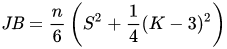

https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test


KS test (Kolmogorov–Smirnov test)

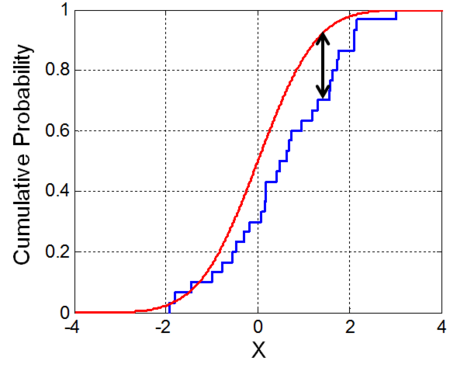

https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

Omnibus embedding is a bit more complicated... http://dml.cs.byu.edu/icdm17ws/Keith.pdf